### I. Define full pipeline OCR

In [1]:
%load_ext autoreload
%autoreload 2

from text_detection.detector import TextDetector
from text_recognition.recognizer import TextRecognizer


from PIL import Image
import os
import numpy
import cv2
import json
import csv
import regex as re

from matplotlib import pyplot as plt

In [2]:
td = TextDetector()
tr = TextRecognizer()

def recognize_from_path_image(path_image):
    
    try:
        image = Image.open(path_image).convert('RGB')
        _, _, result_as_dict = td.detect(image)

        #         for bounding_boxes_image in bounding_boxes_images:
        #             plt.imshow(bounding_boxes_image)
        #             plt.show()
        data, scripts = tr.recognize(data=result_as_dict, show_status = False)        
        # print(scripts)
        output = ""
        for script in scripts:
            # remove ignored characters
            script__ = re.sub('[^A-Za-z0-9 ]+', '', script)
            output = output + ' ' + script__
    except Exception as e:
        print(f"Error: {e}")
        return None, None, None
    return data, scripts, output

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/giangnv/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/giangnv/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='vi', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/dict/latin_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/home/giangnv/.paddleocr/2.1/rec/latin', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
File exists: /home/giangnv/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-133

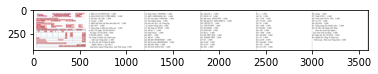

In [3]:
path_image = "./test/images/0001.png"
data, scripts, output = recognize_from_path_image(path_image)

In [4]:
data

{'original_image': './tmp/output/detection/tmp/3edcf701196f4188b0c93e7368625175.jpg',
 'boxes': [{'index': 0,
   'path_file': './tmp/output/detection/image/3edcf701196f4188b0c93e7368625175_000.jpg',
   'bounding_box': [652, 44, 789, 61],
   'org_bounding_box': [[654.0, 46.0],
    [787.0, 46.0],
    [787.0, 59.0],
    [654.0, 59.0]],
   'script': 'Mẫu số: 01GTKT0/001'},
  {'index': 1,
   'path_file': './tmp/output/detection/image/3edcf701196f4188b0c93e7368625175_001.jpg',
   'bounding_box': [296, 44, 580, 69],
   'org_bounding_box': [[301.0, 48.0],
    [576.0, 49.0],
    [576.0, 69.0],
    [300.0, 67.0]],
   'script': 'HÓA ĐƠN GTGT (TIỀN ĐIỆN)'},
  {'index': 2,
   'path_file': './tmp/output/detection/image/3edcf701196f4188b0c93e7368625175_002.jpg',
   'bounding_box': [651, 56, 753, 79],
   'org_bounding_box': [[654.0, 59.0],
    [750.0, 61.0],
    [750.0, 76.0],
    [654.0, 74.0]],
   'script': 'Kỷ hiệu: AE/18E'},
  {'index': 3,
   'path_file': './tmp/output/detection/image/3edcf701196f

In [5]:
scripts

['Mẫu số: 01GTKT0/001',
 'HÓA ĐƠN GTGT (TIỀN ĐIỆN)',
 'Kỷ hiệu: AE/18E',
 'evnspc',
 '(Bản thể hiện của hóa đơn điện tử)',
 'Số: 047?',
 'tổng công ty điện lực miền nai',
 'Kỳ:1 Từ ngày: 20/09/2018 Đến ngày: 19/10/2018',
 'ID HĐ: 66559',
 'Công Ty Điện Lực Vĩnh Long - Điện Lực Vũng Liêm',
 'Địa chỉ: Số 59 Nam Kỳ Khởi Nghĩa, khóm 1, thị trần Vũng Liêm, huyện Vũng Liêm, tỉnh Vĩnh Long',
 'Điện thoại: 19009000',
 'MST: 0300942001-021',
 'ĐT sửa chữa: 19001006',
 'Tên khách hàng:',
 'Địa chỉ: ấp 1- xã Trung Ngãi- huyện Vũng Liêm',
 'Số công tơ: 07040',
 'Số hộ: 1',
 'Điện thoại:',
 'MST:',
 'Mã tổ:',
 'Mã KH: PB10050004',
 'Mã T.toán: PB10050004',
 'Mã NN: 4402',
 'Số GCS: E0519-010',
 'Cấp ĐA: 1',
 'PGCS: 19',
 'Mã trạm: 100537950',
 'Mã giá: KT: 100%-SHBT-A',
 'CHỈ SỐ CŨ',
 'CHỈ SỐ MỚI',
 'HS NHÂN',
 'ĐƠN GIÁ',
 'Bộ Cs',
 'ĐN TIÊU THỤ',
 'THÀNH TIỀN',
 'KT',
 '8.429',
 '8.157',
 '272',
 '1',
 '50',
 '1.549',
 '77.450',
 '50',
 '1.600',
 '80.000',
 '100',
 '1.858',
 '185.800',
 '72',
 '2.

In [6]:
output

' Mu s 01GTKT0001 HA N GTGT TIN IN K hiu AE18E evnspc Bn th hin ca ha n in t S 047 tng cng ty in lc min nai K1 T ngy 20092018 n ngy 19102018 ID H 66559 Cng Ty in Lc Vnh Long  in Lc Vng Lim a ch S 59 Nam K Khi Ngha khm 1 th trn Vng Lim huyn Vng Lim tnh Vnh Long in thoi 19009000 MST 0300942001021 T sa cha 19001006 Tn khch hng a ch p 1 x Trung Ngi huyn Vng Lim S cng t 07040 S h 1 in thoi MST M t M KH PB10050004 M Tton PB10050004 M NN 4402 S GCS E0519010 Cp A 1 PGCS 19 M trm 100537950 M gi KT 100SHBTA CH S C CH S MI HS NHN N GI B Cs N TIU TH THNH TIN KT 8429 8157 272 1 50 1549 77450 50 1600 80000 100 1858 185800 72 2340 168480 272 511730 Cng Thu GTGT Thu sut GTGT 10 51173 562903 Tng cng tin thanh ton S tin vit bng ch Nm trm su mi hai nghn chin trm linh ba ng Ngy k 23102018 Ngi k Cng Ty in Lc Vnh Long  in Lc Vng Lim'

## II. Text classifier and extractor

### II.1. Extract total money from bill

In [18]:
from text_extraction.extractor import TotalMoneyExtractor

tme = TotalMoneyExtractor()
top_total_money, hor_total_money, ver_total_money = tme.extract(data, scripts)
print(top_total_money, hor_total_money, ver_total_money)

60 Tổng cộng tiền thanh toán:
Horizontal: 562903
Top Amount: 562903
562903 562903 None


### II.2. Classifier the bill

In [17]:
from text_classification.classifier import BillClassifer

bc = BillClassifer()
_, label = bc.classify(scripts)
print(label)

gà
hóa đơn điện
evn
điện lực
living_electricpayment


In [ ]:
### II.3. Combine the result of text classifier

In [21]:
result_classifer_and_extractor = {}
result_classifer_and_extractor["Type of bill"] = label
result_classifer_and_extractor["Total amount money candidate"] = [top_total_money, hor_total_money, ver_total_money]

In [22]:
print(result_classifer_and_extractor)

{'Type of bill': 'living_electricpayment', 'Total amount money candidate': [562903, 562903, None]}
